In [1]:
import numpy as np
import pandas as pd

In [2]:
avg_dNdS_df=pd.read_csv('../results/Ensembl98_mouse/mouse.dNdS_stats.all_genes.tsv',sep='\t',usecols=['Gene name','mean'],index_col='Gene name')

avg_dNdS_df.rename(columns={'mean':'avg_dNdS'},inplace=True)

In [3]:
avg_dNdS_df

,avg_dNdS
Gene name,
mt-Cytb,0.020620
mt-Nd6,0.016243
mt-Nd5,0.040241
mt-Nd4l,0.013863
mt-Nd3,0.037464
...,...
Kmt2b,0.131660
Fhl4,0.510940
Phc3,0.092761


In [9]:
# enriched genes based on Zeisel et al., 2015 single cell RNA seq data
sc_df=pd.read_excel('../data/single-cell/zeisel_2015/TableS1.xlsx')

/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [10]:
sc_df.drop(labels=0, axis=0, inplace=True) # drop first row, which just says "all genes"

In [50]:
df = sc_df.melt(var_name='Cell Class',value_name='Gene').dropna()

In [52]:
df.set_index('Gene',inplace=True)

In [54]:
df=pd.merge(left=df,right=avg_dNdS_df,left_index=True,right_index=True,how='left')

In [55]:
df.shape

(3189, 2)

In [57]:
df=df.dropna()

In [62]:
df.shape # 3189-2718=471, number of genes without dN/dS

(2718, 2)

In [61]:
# number of cell class-specific genes with dN/dS
df['Cell Class'].value_counts()

Ependymal          398
Oligodendrocyte    392
Microglia          376
CA1 Pyramidal      346
Interneuron        314
Endothelial        311
S1 Pyramidal       235
Astrocyte          211
Mural              135
Name: Cell Class, dtype: int64

In [63]:
df

,Cell Class,avg_dNdS
Gene,,
1110017D15Rik,Ependymal,0.250637
1700001O22Rik,Ependymal,0.530832
1700003E16Rik,Ependymal,0.361321
1700007K13Rik,Ependymal,0.215250
1700013F07Rik,Ependymal,0.433112
...,...,...
Whrn,Mural,0.082454
Wnt5b,Mural,0.030886
Wtip,Mural,0.105162


In [65]:
df['Cell Class'].unique()

array(['Ependymal', 'Oligodendrocyte', 'Microglia', 'CA1 Pyramidal',
       'Interneuron', 'Endothelial', 'S1 Pyramidal', 'Astrocyte', 'Mural'],
      dtype=object)

In [69]:
print("Median dN/dS of Each Cell Class")
print('-------------------------------')
for celltype in df['Cell Class'].unique():
    median_dNdS = df[df['Cell Class']==celltype]['avg_dNdS'].median()
    print(celltype)
    print(median_dNdS)

Median dN/dS of Each Cell Class
-------------------------------
Ependymal
0.15744211811166892
Oligodendrocyte
0.1092200348198472
Microglia
0.15883164570816916
CA1 Pyramidal
0.07380943955577254
Interneuron
0.078513767522849
Endothelial
0.1125432901669736
S1 Pyramidal
0.0784024057740921
Astrocyte
0.1075759118175674
Mural
0.1004906870216212


In [ ]:
# class_dict={}
# for celltype in sc_df.columns:
#     gene_df=sc_df[celltype]
#     class_dict.update({celltype:gene_df})

# dNdS_dict={}
# for celltype in class_dict:
#     dNdS_list=avg_dNdS_df[avg_dNdS_df.index.isin(class_dict[celltype])]['avg_dNdS']
#     dNdS_dict.update({celltype:dNdS_list})

# dNdS_dict.keys()

# Statistics and Visualization

In [81]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.dpi']= 300
import scipy.stats as stats
import pingouin as pg
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [35]:
color_dict={
    'Ependymal':'tab:olive', 
    'Oligodendrocyte':'tab:cyan',
    'Microglia':'tab:orange',
    'CA1 Pyramidal':'tab:red',
    'Interneuron':'tab:purple',
    'Endothelial':'tab:blue',
    'S1 Pyramidal':'tab:pink',
    'Astrocyte':'tab:green',
    'Mural':'royalblue'
}

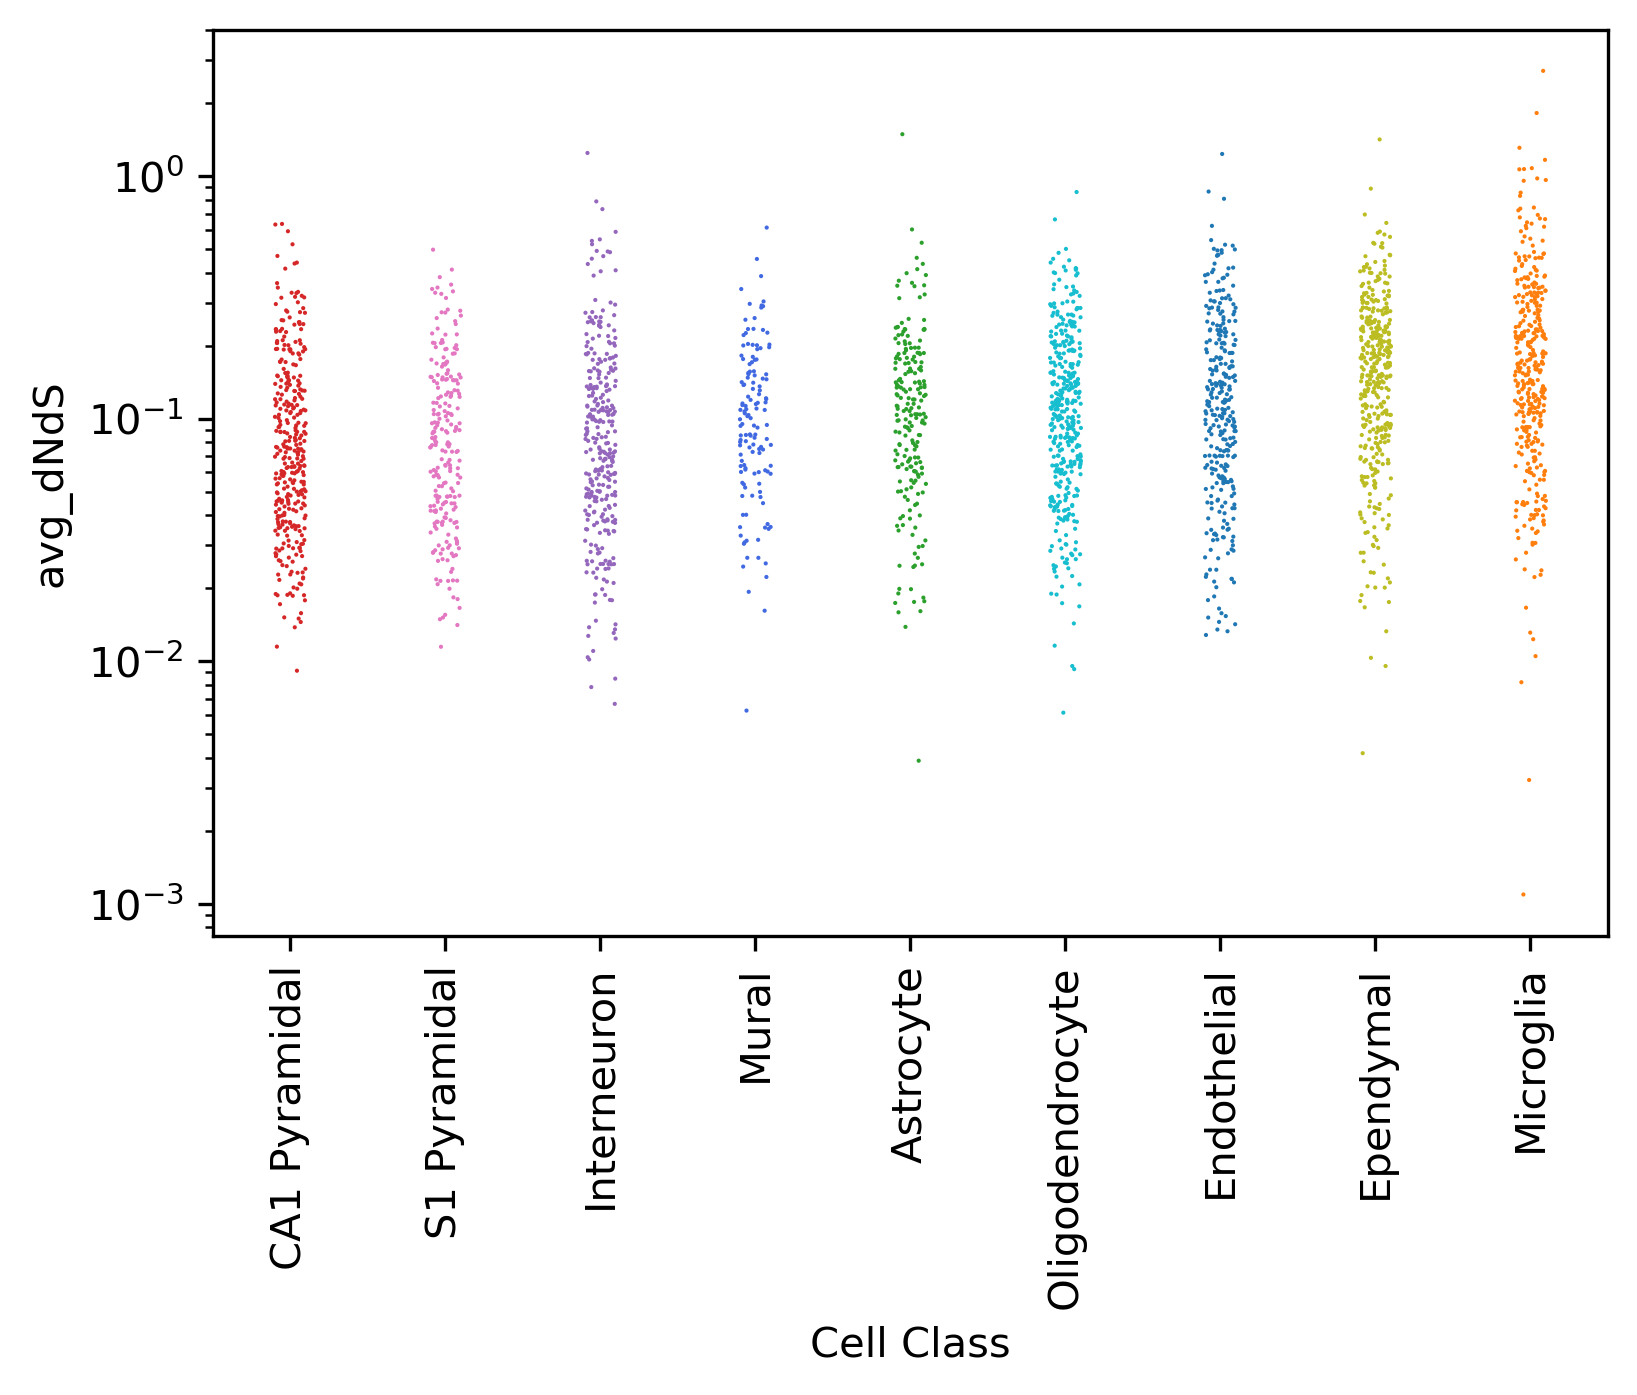

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
sns.stripplot(x='Cell Class',y='avg_dNdS',data=df,palette=color_dict,order=['CA1 Pyramidal', 'S1 Pyramidal', 'Interneuron', 'Mural', 'Astrocyte', 'Oligodendrocyte', 'Endothelial', 'Ependymal', 'Microglia'],size=1)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0.98, 'Distribution of dN/dS of Mouse Cell Types')

Text(0.5, 0, 'dN/dS')

Text(0, 0.5, 'number of genes')

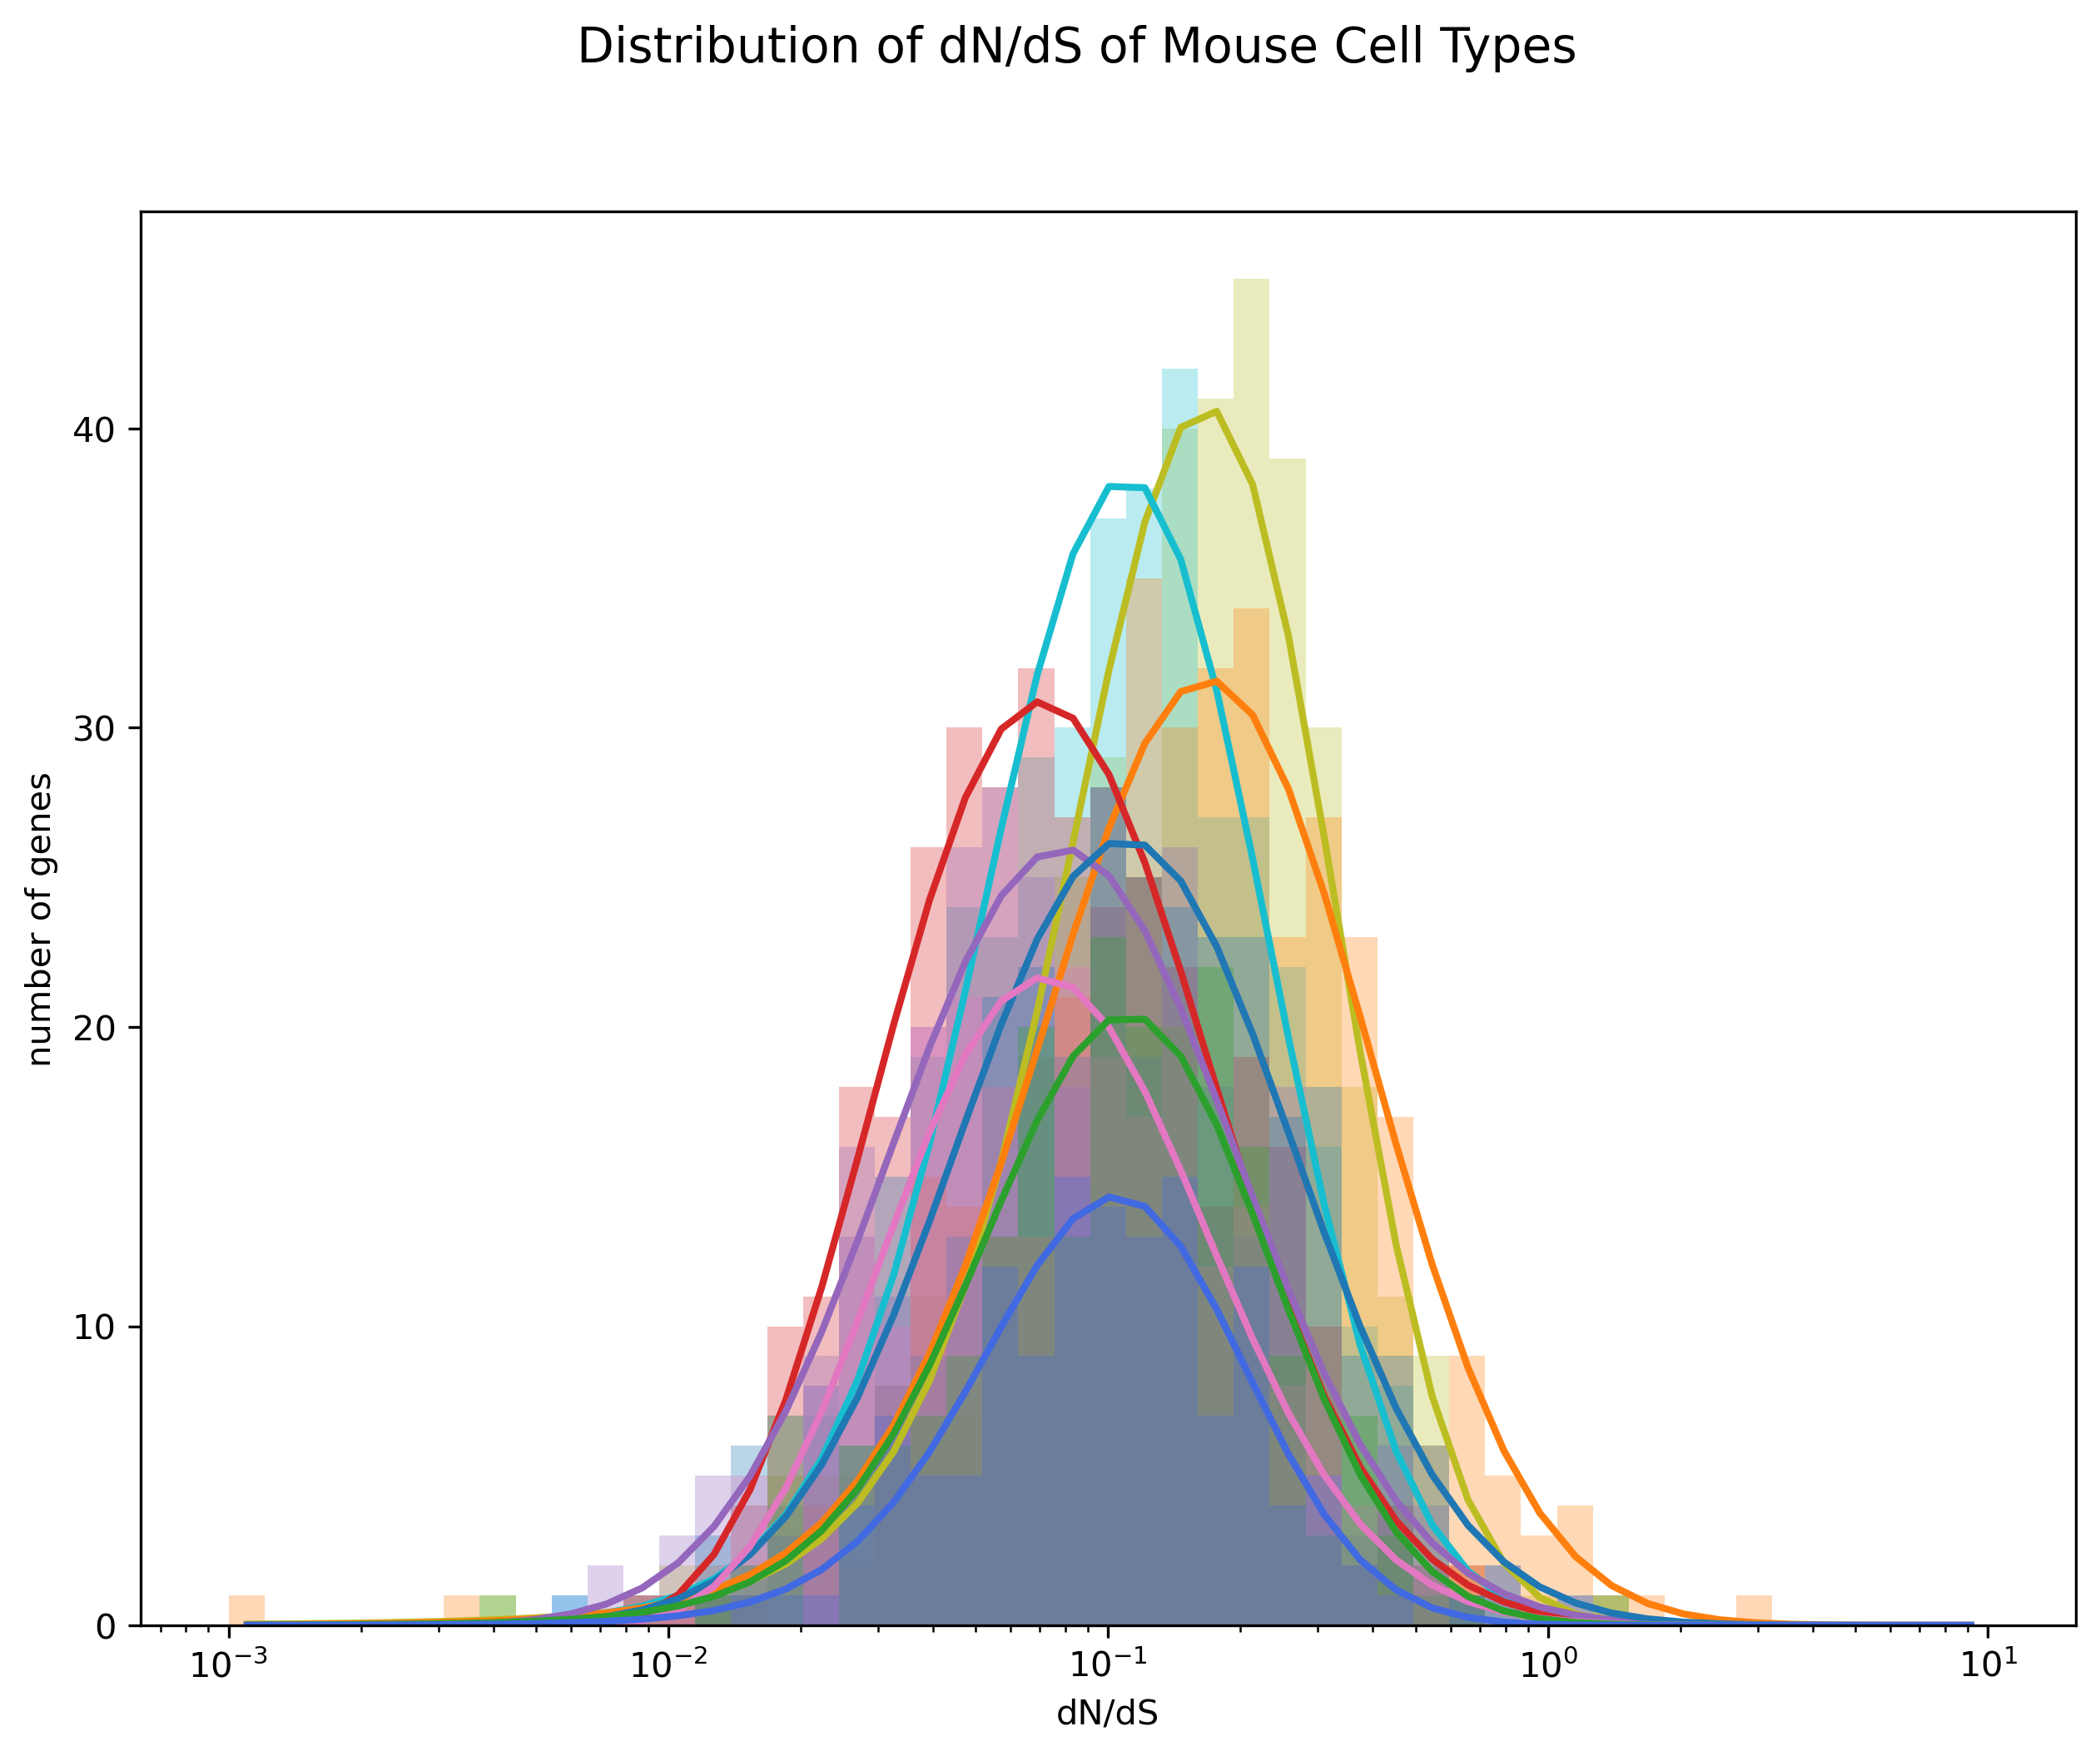

In [90]:
# Creating a figure 
fig = plt.figure(figsize=(10,7.5)) # Size of a letter size paper in horizontal
fig.suptitle('Distribution of dN/dS of Mouse Cell Types', fontsize=14)

# Setting subplot space
grid = plt.GridSpec(nrows=1,ncols=1)
#grid.update(wspace=0.5, hspace=0.3)

# The subplot for distribution histogram 
distr_plot = fig.add_subplot(grid[:,:])

# Set up the bins for log scale x-axis, and get the centers
bins=np.logspace(np.log10(0.001),np.log10(10), 50)
bins_cntr = (bins[1:] + bins[:-1]) / 2

# arr_dict={
#     'exc':exc_arr,
#     'inh':inh_arr,
#     'both':both_arr,
#     # 'nonN':nonN_arr
# }

# name_dict={
#     'exc':'excitatory neuron',
#     'inh':'inhibitory neuron',
#     'both':'coreleasing neuron',
#     # 'nonN':'non-neuron'
# }

for celltype in df['Cell Class'].unique():
    arr=df[df['Cell Class']==celltype]['avg_dNdS'].to_numpy()
    counts, bin_edges, ignored = distr_plot.hist(arr,bins,histtype='stepfilled',alpha=0.3,color=color_dict[celltype],label='dN/dS of '+celltype+'-specific genes (med={0:.3f})'.format(np.median(arr)))
    try:
        # calculate area of histograms (area under PDF should be 1)
        area_hist = ((bin_edges[1:] - bin_edges[:-1]) * counts).sum()
        shape, loc, scale = stats.lognorm.fit(arr)
        # pdf-values using cdf 
        fit_log_cntr_ = stats.lognorm.cdf(bins, shape, loc=loc, scale=scale)
        fit_log_cntr = np.diff(fit_log_cntr_)
        # plot fitted and scaled PDFs into histogram
        distr_plot.plot(bins_cntr, fit_log_cntr * counts.sum(),color=color_dict[celltype],linestyle='solid', 
                        label='lognormal fit of '+celltype+'-specific dN/dS distribution', linewidth=2)
    except ValueError:
        pass

# Axis labels
distr_plot.set_xlabel(xlabel='dN/dS')
distr_plot.set_ylabel(ylabel='number of genes')
distr_plot.set_xscale('log')
# distr_plot.legend(loc=(1.04,0.3))

# distr_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1))

# fig.savefig('../figures/mouse.organs.pdf')
# fig.savefig('../figures/mouse.organs.eps')
# fig.savefig('../figures/mouse.organs.png')
# plt.close()

In [91]:
arr_dict={}
for celltype in df['Cell Class'].unique():
    arr=df[df['Cell Class']==celltype]['avg_dNdS'].to_numpy()
    arr_dict.update({celltype:arr})

In [92]:
pg.mwu(arr_dict['CA1 Pyramidal'],arr_dict['Mural'],alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,19280.0,two-sided,0.002933,0.174481,0.41276


In [107]:
pg.mwu(arr_dict['Interneuron'],arr_dict['Mural'],alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,18285.0,two-sided,0.021018,0.137297,0.431352


In [104]:
from itertools import combinations

### With 0.0001 strict threshold for p-value

In [120]:
for perm in combinations(['CA1 Pyramidal', 'S1 Pyramidal', 'Interneuron', 'Mural', 'Astrocyte', 'Oligodendrocyte', 'Endothelial', 'Ependymal', 'Microglia'],2):
    celltype1 = perm[0]
    celltype2 = perm[1]

    mwu_df = pg.mwu(arr_dict[celltype2],arr_dict[celltype1],alternative='two-sided')
    
    if mwu_df.loc['MWU','p-val'] < 0.0001:
        print('------------------')
        print(celltype1+' vs '+celltype2)
        mwu_df

------------------
CA1 Pyramidal vs Astrocyte


,U-val,alternative,p-val,RBC,CLES
MWU,43991.0,two-sided,0.000048,-0.205134,0.602567


------------------
CA1 Pyramidal vs Oligodendrocyte


,U-val,alternative,p-val,RBC,CLES
MWU,82188.0,two-sided,6.603787e-07,-0.211926,0.605963


------------------
CA1 Pyramidal vs Endothelial


,U-val,alternative,p-val,RBC,CLES
MWU,66357.0,two-sided,2.365859e-07,-0.233333,0.616666


------------------
CA1 Pyramidal vs Ependymal


,U-val,alternative,p-val,RBC,CLES
MWU,97488.0,two-sided,1.208884e-22,-0.415865,0.707933


------------------
CA1 Pyramidal vs Microglia


,U-val,alternative,p-val,RBC,CLES
MWU,93282.0,two-sided,6.469598e-24,-0.434049,0.717024


------------------
S1 Pyramidal vs Oligodendrocyte


,U-val,alternative,p-val,RBC,CLES
MWU,55411.0,two-sided,0.000021,-0.203018,0.601509


------------------
S1 Pyramidal vs Endothelial


,U-val,alternative,p-val,RBC,CLES
MWU,44859.0,two-sided,0.000005,-0.227584,0.613792


------------------
S1 Pyramidal vs Ependymal


,U-val,alternative,p-val,RBC,CLES
MWU,66300.0,two-sided,1.527188e-18,-0.417727,0.708863


------------------
S1 Pyramidal vs Microglia


,U-val,alternative,p-val,RBC,CLES
MWU,63356.0,two-sided,1.669733e-19,-0.434043,0.717021


------------------
Interneuron vs Oligodendrocyte


,U-val,alternative,p-val,RBC,CLES
MWU,72347.0,two-sided,0.00006,-0.175533,0.587766


------------------
Interneuron vs Endothelial


,U-val,alternative,p-val,RBC,CLES
MWU,58643.0,two-sided,0.000014,-0.201036,0.600518


------------------
Interneuron vs Ependymal


,U-val,alternative,p-val,RBC,CLES
MWU,86340.0,two-sided,2.064713e-18,-0.38175,0.690875


------------------
Interneuron vs Microglia


,U-val,alternative,p-val,RBC,CLES
MWU,82586.0,two-sided,1.665120e-19,-0.399004,0.699502


------------------
Mural vs Ependymal


,U-val,alternative,p-val,RBC,CLES
MWU,35047.0,two-sided,1.215947e-07,-0.30456,0.65228


------------------
Mural vs Microglia


,U-val,alternative,p-val,RBC,CLES
MWU,33574.0,two-sided,2.583428e-08,-0.322853,0.661426


------------------
Astrocyte vs Ependymal


,U-val,alternative,p-val,RBC,CLES
MWU,52784.0,two-sided,1.746179e-07,-0.257091,0.628546


------------------
Astrocyte vs Microglia


,U-val,alternative,p-val,RBC,CLES
MWU,50572.0,two-sided,3.200540e-08,-0.274882,0.637441


------------------
Oligodendrocyte vs Ependymal


,U-val,alternative,p-val,RBC,CLES
MWU,96926.0,two-sided,3.656162e-09,-0.242514,0.621257


------------------
Oligodendrocyte vs Microglia


,U-val,alternative,p-val,RBC,CLES
MWU,93334.0,two-sided,1.662719e-10,-0.266473,0.633237


------------------
Endothelial vs Ependymal


,U-val,alternative,p-val,RBC,CLES
MWU,73139.0,two-sided,0.000032,-0.181777,0.590889


------------------
Endothelial vs Microglia


,U-val,alternative,p-val,RBC,CLES
MWU,70958.0,two-sided,0.000001,-0.213621,0.606811


In [121]:
df_list=[]

for perm in combinations(['CA1 Pyramidal', 'S1 Pyramidal', 'Interneuron', 'Mural', 'Astrocyte', 'Oligodendrocyte', 'Endothelial', 'Ependymal', 'Microglia'],2):
    celltype1 = perm[0]
    celltype2 = perm[1]
    row = celltype1+' vs '+celltype2

    mwu_df = pg.mwu(arr_dict[celltype2],arr_dict[celltype1],alternative='two-sided')
    mwu_df.index=[row]
    
    df_list.append(mwu_df)
    
stats_df = pd.concat(df_list)

In [123]:
stats_df.to_csv('../results/single-cell/zeisel_2015/mwu-stats.tsv',sep='\t')

In [129]:
df['Cell Class'].unique()

array(['Ependymal', 'Oligodendrocyte', 'Microglia', 'CA1 Pyramidal',
       'Interneuron', 'Endothelial', 'S1 Pyramidal', 'Astrocyte', 'Mural'],
      dtype=object)

In [126]:
pg.kruskal(data=df,dv='avg_dNdS',between='Cell Class')

,Source,ddof1,H,p-unc
Kruskal,Cell Class,8,228.703942,5.566630e-45


In [135]:
pg.kruskal(data=df[df['Cell Class'].isin(['S1 Pyramidal','Interneuron','CA1 Pyramidal'])],dv='avg_dNdS',between='Cell Class')

,Source,ddof1,H,p-unc
Kruskal,Cell Class,2,0.465024,0.79254


In [ ]:
pg.kruskal(data=df[df['Cell Class'].isin(['S1 Pyramidal','Interneuron','CA1 Pyramidal'])],dv='avg_dNdS',between='Cell Class')